In [91]:
import akshare as ak

futures_fees_info_df = ak.futures_fees_info()

,交易所,合约代码,合约名称,品种代码,品种名称,合约乘数,最小跳动,开仓费率（按金额）,开仓费用（按手）,平仓费率（按金额）,...,1Tick平仓盈亏,1Tick平仓净利,2Tick平仓净利,1Tick平仓收益率%,2Tick平仓收益率%,1Tick平今净利,2Tick平今净利,1Tick平今收益率%,2Tick平今收益率%,更新时间
0,CZCE,AP503,苹果3月,AP,苹果,10,1.0,0.000001,5.01,0.000001,...,10.0,-0.12,9.88,-0.001,0.116,-15.12,-5.12,-0.177,-0.060,2025-02-10 15:58:08
1,CZCE,AP504,苹果4月,AP,苹果,10,1.0,0.000001,5.01,0.000001,...,10.0,-0.12,9.88,-0.001,0.116,-15.12,-5.12,-0.177,-0.060,2025-02-10 15:58:08
2,CZCE,AP505,苹果5月,AP,苹果,10,1.0,0.000001,5.01,0.000001,...,10.0,-0.13,9.87,-0.001,0.109,-15.13,-5.13,-0.167,-0.057,2025-02-10 15:58:08
3,CZCE,AP510,AP510,AP,苹果,10,1.0,0.000001,5.01,0.000001,...,10.0,-0.14,9.86,-0.002,0.129,-15.14,-5.14,-0.198,-0.067,2025-02-10 15:58:08
4,CZCE,AP511,AP511,AP,苹果,10,1.0,0.000001,5.01,0.000001,...,10.0,-0.14,9.86,-0.002,0.130,-15.14,-5.14,-0.200,-0.068,2025-02-10 15:58:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,SHFE,zn2509,zn2509,zn,锌,5,5.0,0.000001,3.01,0.000001,...,25.0,18.79,43.79,0.178,0.416,21.80,46.80,0.207,0.444,2025-02-10 15:58:08
784,SHFE,zn2510,zn2510,zn,锌,5,5.0,0.000001,3.01,0.000001,...,25.0,18.79,43.79,0.179,0.416,21.80,46.80,0.207,0.445,2025-02-10 15:58:08
785,SHFE,zn2511,zn2511,zn,锌,5,5.0,0.000001,3.01,0.000001,...,25.0,18.79,43.79,0.180,0.419,21.80,46.80,0.208,0.448,2025-02-10 15:58:08
786,SHFE,zn2512,zn2512,zn,锌,5,5.0,0.000001,3.01,0.000001,...,25.0,18.79,43.79,0.179,0.418,21.80,46.80,0.208,0.446,2025-02-10 15:58:08


In [98]:
# Step 1: Merge rows with the same '品种代码' and keep the row with the maximum '成交量'
merged_df = futures_fees_info_df.groupby('品种代码').apply(lambda x: x.sort_values('成交量', ascending=False).head(1)).reset_index(drop=True)

# Step 2: Sort by '成交量' descending and keep top 20
top_20_df = merged_df.sort_values('成交量', ascending=False).head(20)

# Display the result
top_20_df['品种代码'].values

/tmp/ipykernel_2273/187415412.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = futures_fees_info_df.groupby('品种代码').apply(lambda x: x.sort_values('成交量', ascending=False).head(1)).reset_index(drop=True)


array(['m', 'rb', 'RM', 'SM', 'ag', 'FG', 'TA', 'v', 'p', 'SH', 'SA',
       'MA', 'hc', 'y', 'OI', 'c', 'ru', 'fu', 'au', 'i'], dtype=object)

In [105]:
input_list = ['m', 'rb', 'RM', 'SM', 'ag', 'FG', 'TA', 'v', 'p', 'SH', 'SA', 'MA', 'hc', 'y', 'OI', 'c', 'ru', 'fu', 'au', 'i']
output_list = []

for item in input_list:
    output_item = item.upper() + '0'
    output_list.append(output_item)

all_df = []
for symbol in output_list:
    print(symbol)
    price_df = ak.futures_zh_daily_sina(symbol=symbol)
    price_df['symbol'] = symbol
    all_df.append(price_df)

merged_df = pd.concat(all_df) 
merged_df.to_csv('./prices.csv', index=False)

print("Merged DataFrame saved to ./prices.csv")
print(merged_df.head())

M0
RB0
RM0
SM0
AG0
FG0
TA0
V0
P0
SH0
SA0
MA0
HC0
Y0
OI0
C0
RU0
FU0
AU0
I0
Merged DataFrame saved to ./prices.csv
         date    open    high     low   close  volume   hold  settle symbol
0  2005-01-04  2150.0  2155.0  2142.0  2150.0   58792  63364     0.0     M0
1  2005-01-05  2131.0  2154.0  2127.0  2154.0   71172  62704     0.0     M0
2  2005-01-06  2152.0  2168.0  2146.0  2167.0   66174  63948     0.0     M0
3  2005-01-07  2175.0  2193.0  2162.0  2182.0  125558  61888     0.0     M0
4  2005-01-10  2193.0  2200.0  2170.0  2177.0   87462  61274     0.0     M0


100%|██████████| 2/2 [00:00<00:00,  2.02it/s]


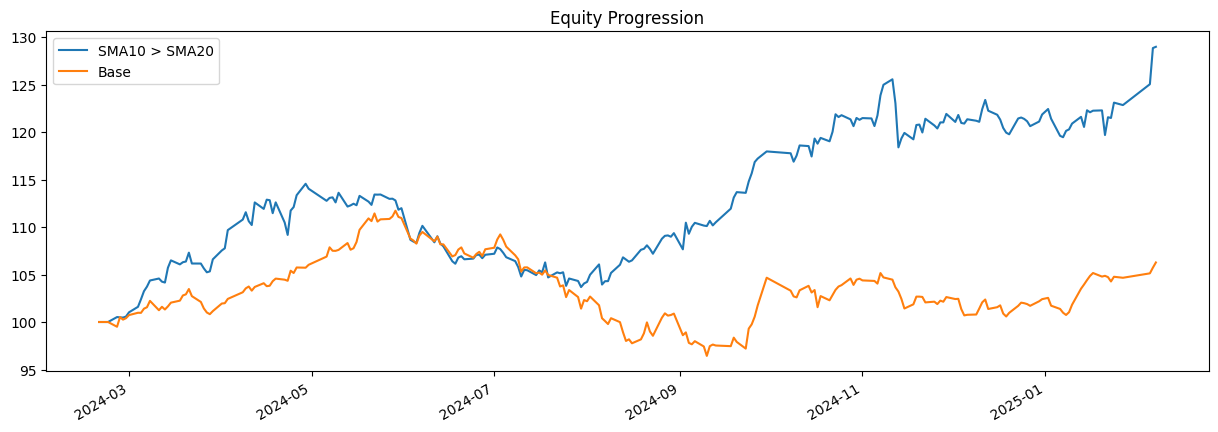

In [145]:
import bt 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


merged_df = pd.read_csv('./prices.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])

pivoted_df = pd.pivot_table(merged_df, values='close', index='date', columns='symbol')
pivoted_df = pivoted_df.dropna()


# Calculate 10-day SMA and 20-day SMA for each symbol
sma10 = pivoted_df.rolling(window=10).mean()
sma30 = pivoted_df.rolling(window=30).mean()
ret_100 = pivoted_df.pct_change(100)
ret_30 = pivoted_df.pct_change(30)

volatility_30 = pivoted_df.pct_change().rolling(window=30).std()
avg_volatility_30 = volatility_30.mean(axis=1)
is_low_volatility = volatility_30 < avg_volatility_30.values[:, None]

## signal: if ret_120 & ret_30 in top 10 then 1 else -1
rank_ret_30 = ret_30.rank(axis=1, ascending=False)
signal_df = (ret_100 > 0) & (rank_ret_30 <= 10) & is_low_volatility
signal_df = signal_df.dropna()


pivoted_df = pivoted_df.reindex(ret_100.dropna().index)

s = bt.Strategy('SMA10 > SMA20', [bt.algos.SelectWhere(signal_df),
                               bt.algos.WeighInvVol(),
                               bt.algos.Rebalance()])

base = bt.Strategy('Base', [bt.algos.SelectAll(),
                               bt.algos.WeighInvVol(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, pivoted_df)
t1 = bt.Backtest(base, pivoted_df)

# and let's run it!
res = bt.run(t, t1)
# what does the equity curve look like?
res.plot();

In [146]:
res.display()

Stat                 SMA10 > SMA20    Base
-------------------  ---------------  ----------
Start                2024-02-20       2024-02-20
End                  2025-02-07       2025-02-07
Risk-free rate       0.00%            0.00%

Total Return         28.97%           6.27%
Daily Sharpe         2.08             0.68
Daily Sortino        3.50             1.15
CAGR                 30.11%           6.49%
Max Drawdown         -9.49%           -13.68%
Calmar Ratio         3.17             0.47

MTD                  4.99%            1.54%
3m                   4.13%            1.06%
6m                   23.66%           6.16%
YTD                  5.85%            3.77%
1Y                   -                -
3Y (ann.)            -                -
5Y (ann.)            -                -
10Y (ann.)           -                -
Since Incep. (ann.)  30.11%           6.49%

Daily Sharpe         2.08             0.68
Daily Sortino        3.50             1.15
Daily Mean (ann.)    28.46%       